<a href="https://colab.research.google.com/github/ivansaputrazebua/Pemograman_Python_1101184447/blob/main/PYTHON_TUBES__Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/python project 

/content/drive/MyDrive/python project


In [3]:
#import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
# grab all image paths in the input datashet directory, then initialize 
# our list of images and coressponding class labels
print("[info] loading images...")
imagePaths = paths.list_images("Copy of dataset5class")
data = []
labels = []

[info] loading images...


In [5]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale the pixel
  # intensities to the range [0, 1], and the update our images list
  image = Image.open(imagePath)
  image = np.array(image.resize((800, 800))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
# perform a training and testing split, using 75% of the data for training and
# 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(347, 800, 800, 3)
(116, 800, 800, 3)


In [9]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, 5,5, activation='relu', input_shape=(800,800,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, 5,5, activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [10]:
# train the model kusing the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [16]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=1000, batch_size=10)

Epoch 1/1000
35/35 [==============================] - 2s 47ms/step - loss: 2.2279e-05 - accuracy: 1.0000 - val_loss: 0.8221 - val_accuracy: 0.8707
Epoch 2/1000
35/35 [==============================] - 1s 39ms/step - loss: 2.1474e-05 - accuracy: 1.0000 - val_loss: 0.8228 - val_accuracy: 0.8793
Epoch 3/1000
35/35 [==============================] - 1s 39ms/step - loss: 2.0484e-05 - accuracy: 1.0000 - val_loss: 0.8149 - val_accuracy: 0.8793
Epoch 4/1000
35/35 [==============================] - 1s 39ms/step - loss: 2.0666e-05 - accuracy: 1.0000 - val_loss: 0.8215 - val_accuracy: 0.8793
Epoch 5/1000
35/35 [==============================] - 1s 38ms/step - loss: 1.9524e-05 - accuracy: 1.0000 - val_loss: 0.8166 - val_accuracy: 0.8793
Epoch 6/1000
35/35 [==============================] - 1s 38ms/step - loss: 1.9951e-05 - accuracy: 1.0000 - val_loss: 0.8045 - val_accuracy: 0.8793
Epoch 7/1000
35/35 [==============================] - 1s 38ms/step - loss: 1.9251e-05 - accuracy: 1.0000 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


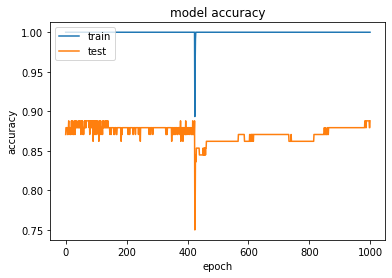

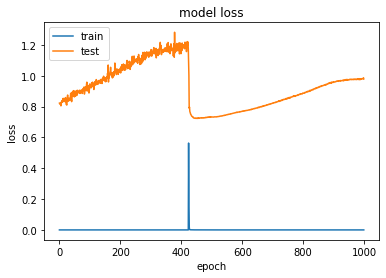

In [17]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_06       0.91      0.85      0.88        34
      GMB_07       0.84      0.96      0.90        27
      GMB_08       0.90      0.90      0.90        30
      GMB_09       0.87      0.93      0.90        14
      GMB_10       1.00      0.73      0.84        11

    accuracy                           0.89       116
   macro avg       0.90      0.87      0.88       116
weighted avg       0.89      0.89      0.89       116



In [19]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets
